<a href="https://colab.research.google.com/github/rygrim1/Sage-Projects/blob/master/Epsilon_ZrO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Epsilon.x


In [ ]:
epsr = pd.read_excel('/content/epsilon.xlsx',sheet_name='epsr')
epsi = pd.read_excel('/content/epsilon.xlsx',sheet_name='epsi')

FileNotFoundError: ignored

In [ ]:
epsr

In [ ]:
epsi

In [ ]:
epsr['eps_mean'] = (epsr.epsr_x+epsr.epsr_y+epsr.epsr_z)/3
epsi['eps_mean'] = (epsi.epsi_x+epsi.epsi_y+epsi.epsi_z)/3

In [ ]:
eps_r_plot = sns.relplot(data=epsr.iloc[:300],x='energy', y='eps_mean',kind='line')

In [ ]:
eps_i_plot = sns.relplot(data=epsi.iloc[:300],x='energy', y='eps_mean',kind='line')

In [ ]:
eps = pd.merge(epsr,epsi, on='energy',suffixes=('_r','_i'))
eps = eps.head(201)

In [ ]:
eps

In [ ]:
eps.plot(x='energy',y=['epsr_x','epsi_x'])

# YAMBO


In [ ]:
eps = pd.read_excel('eps.xlsx',header=0,sheet_name='GW_IPA')
eps

,E/ev,EPS-Im,EPS-Re
0,0.000000,0.027988,4.023380
1,0.020000,0.027988,4.023392
2,0.040000,0.027989,4.023426
3,0.060000,0.027991,4.023481
4,0.080000,0.027993,4.023561
...,...,...,...
996,19.920000,0.826072,-0.108901
997,19.939999,0.823731,-0.114138
998,19.959999,0.820608,-0.119459
999,19.980000,0.816658,-0.124566


In [ ]:
# eps.plot(x='E/ev',y=['EPSo-Re','EPSo-Im'])

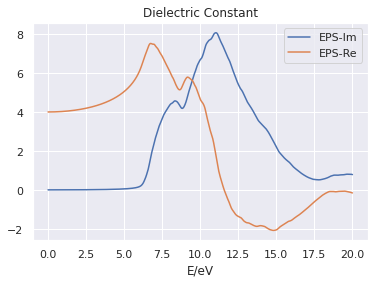

In [ ]:
sns.set_theme()
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps['E/ev'],eps['EPS-Im'], eps['E/ev'],eps['EPS-Re'])
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['EPS-Im','EPS-Re'])
plt.savefig('Dielectric_Constant.png',dpi=300)

#  n and k 

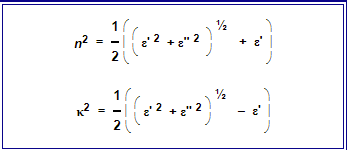

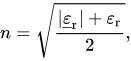

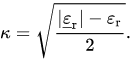

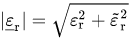

In [ ]:
eps_1 = eps['EPS-Re']
eps_2 = eps['EPS-Im']
freq = eps['E/ev']

eps_0 = eps_1[0]
term1 = np.sqrt((np.square(eps_1) + np.square(eps_2)))
n_square = 0.5 * (term1 + eps_1)
k_square = 0.5 * (term1 - eps_1)
n = np.sqrt(n_square)
k = np.sqrt(k_square)
eps['n'] = n
eps['k'] = k

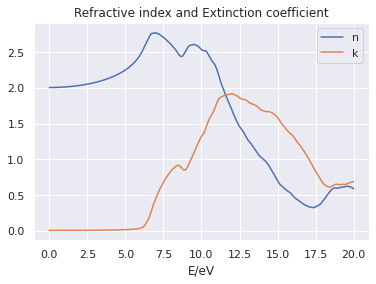

In [ ]:
plt.figure()
plt.title("Refractive index and Extinction coefficient")
plt.plot(eps['E/ev'],eps['n'], eps['E/ev'],eps['k'])
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['n','k'])
plt.savefig('n_and_k.png',dpi=300)

In [ ]:
n_0 = n[0]

In [ ]:
print('epsilon_0:', eps_0)
print('n_0: ', n_0)

epsilon_0: 3.98547482
n_0:  1.9963772089759593


# alpha and R

In [ ]:
def ev2lambda(eV):
    if eV == 0:
        return np.nan
    else:
        return 1.24/eV

In [ ]:

eps['wavelength(um)'] = eps['E/ev'].apply(lambda x : ev2lambda(x))
eps

,E/ev,EPS-Im,EPS-Re,n,k,wavelength(um)
0,0.000000,0.027988,4.023380,2.005849,0.006976,NaN
1,0.020000,0.027988,4.023392,2.005852,0.006977,62.000001
2,0.040000,0.027989,4.023426,2.005860,0.006977,31.000001
3,0.060000,0.027991,4.023481,2.005874,0.006977,20.666667
4,0.080000,0.027993,4.023561,2.005894,0.006978,15.500000
...,...,...,...,...,...,...
996,19.920000,0.826072,-0.108901,0.601796,0.686338,0.062249
997,19.939999,0.823731,-0.114138,0.598942,0.687655,0.062187
998,19.959999,0.820608,-0.119459,0.595734,0.688736,0.062124
999,19.980000,0.816658,-0.124566,0.592257,0.689445,0.062062


$\alpha=\frac{4 \pi k}{\lambda}$

In [ ]:
wavelength = eps['wavelength(um)']

alpha = 4 * np.pi * k / wavelength *1e4
eps['absorption(cm^(-1))'] = alpha
eps

,E/ev,EPS-Im,EPS-Re,n,k,wavelength(um),absorption(cm^(-1))
0,0.000000,0.027988,4.023380,2.005849,0.006976,NaN,NaN
1,0.020000,0.027988,4.023392,2.005852,0.006977,62.000001,1.414036e+01
2,0.040000,0.027989,4.023426,2.005860,0.006977,31.000001,2.828168e+01
3,0.060000,0.027991,4.023481,2.005874,0.006977,20.666667,4.242497e+01
4,0.080000,0.027993,4.023561,2.005894,0.006978,15.500000,5.657122e+01
...,...,...,...,...,...,...,...
996,19.920000,0.826072,-0.108901,0.601796,0.686338,0.062249,1.385529e+06
997,19.939999,0.823731,-0.114138,0.598942,0.687655,0.062187,1.389581e+06
998,19.959999,0.820608,-0.119459,0.595734,0.688736,0.062124,1.393163e+06
999,19.980000,0.816658,-0.124566,0.592257,0.689445,0.062062,1.395993e+06


In [ ]:
eps['R'] = ((eps['n'] - 1)*(eps['n'] - 1) + (eps['k']) * (eps['k']) )/ ((eps['n'] + 1)*(eps['n'] + 1) + (eps['k']) * (eps['k']))
eps

,E/ev,EPS-Im,EPS-Re,n,k,wavelength(um),absorption(cm^(-1)),R
0,0.000000,0.027988,4.023380,2.005849,0.006976,NaN,NaN,0.111982
1,0.020000,0.027988,4.023392,2.005852,0.006977,62.000001,1.414036e+01,0.111983
2,0.040000,0.027989,4.023426,2.005860,0.006977,31.000001,2.828168e+01,0.111984
3,0.060000,0.027991,4.023481,2.005874,0.006977,20.666667,4.242497e+01,0.111986
4,0.080000,0.027993,4.023561,2.005894,0.006978,15.500000,5.657122e+01,0.111989
...,...,...,...,...,...,...,...,...
996,19.920000,0.826072,-0.108901,0.601796,0.686338,0.062249,1.385529e+06,0.207331
997,19.939999,0.823731,-0.114138,0.598942,0.687655,0.062187,1.389581e+06,0.209183
998,19.959999,0.820608,-0.119459,0.595734,0.688736,0.062124,1.393163e+06,0.211138
999,19.980000,0.816658,-0.124566,0.592257,0.689445,0.062062,1.395993e+06,0.213109


In [ ]:
df_for_alpha = eps[eps['wavelength(um)']>0.3]
df_for_alpha = df_for_alpha[df_for_alpha['wavelength(um)']<8]
df_for_alpha

In [ ]:
df_for_alpha = eps[eps['E/ev']>0]
df_for_alpha = df_for_alpha[df_for_alpha['E/ev']<20]
df_for_alpha

,E/ev,EPS-Im,EPS-Re,n,k,wavelength(um),absorption(cm^(-1)),R
1,0.020000,0.027988,4.023392,2.005852,0.006977,62.000001,1.414036e+01,0.111983
2,0.040000,0.027989,4.023426,2.005860,0.006977,31.000001,2.828168e+01,0.111984
3,0.060000,0.027991,4.023481,2.005874,0.006977,20.666667,4.242497e+01,0.111986
4,0.080000,0.027993,4.023561,2.005894,0.006978,15.500000,5.657122e+01,0.111989
5,0.100000,0.027997,4.023663,2.005919,0.006979,12.400000,7.072134e+01,0.111993
...,...,...,...,...,...,...,...,...
995,19.900000,0.827808,-0.103943,0.604303,0.684928,0.062312,1.381293e+06,0.205626
996,19.920000,0.826072,-0.108901,0.601796,0.686338,0.062249,1.385529e+06,0.207331
997,19.939999,0.823731,-0.114138,0.598942,0.687655,0.062187,1.389581e+06,0.209183
998,19.959999,0.820608,-0.119459,0.595734,0.688736,0.062124,1.393163e+06,0.211138


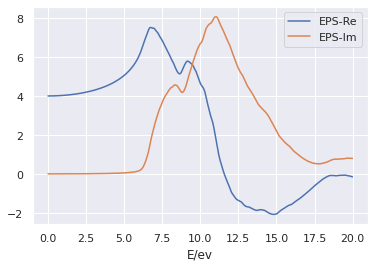

In [ ]:
ax = df_for_alpha.plot(x='E/ev', y=['EPS-Re','EPS-Im'])

(7.597903139587873, 4601265.456397757)

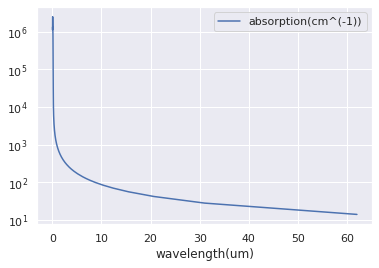

In [ ]:
ax = df_for_alpha.plot(x='wavelength(um)', y='absorption(cm^(-1))')
ax.set_yscale('log')
ax.set_ylim(auto=True)

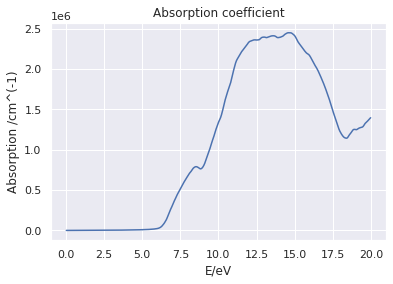

In [ ]:
plt.figure()
plt.title("Absorption coefficient")
plt.plot(df_for_alpha['E/ev'],df_for_alpha['absorption(cm^(-1))'])
plt.xlabel('E/eV')
plt.ylabel('Absorption /cm^(-1)')
plt.savefig('Absorption_coefficient.png',dpi=300)

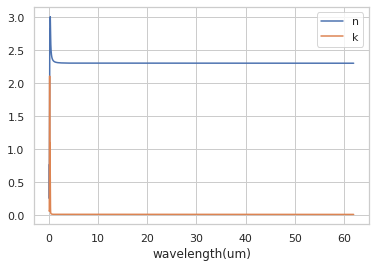

In [ ]:
ax = df_for_alpha.plot(x='wavelength(um)', y=['n', 'k'])

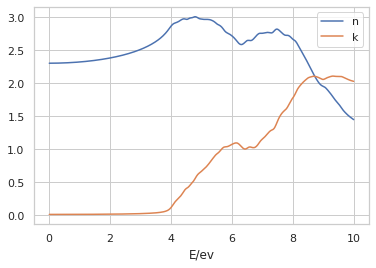

In [ ]:
ax = df_for_alpha.plot(x='E/ev', y=['n', 'k'])

In [ ]:
ax = df_for_alpha.plot(x='wavelength(um)', y=['n'])

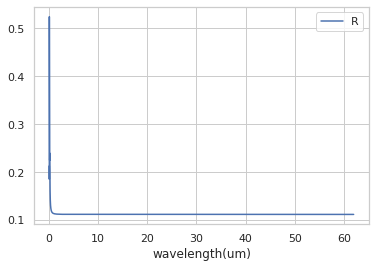

In [ ]:
df_for_alpha.plot(x='wavelength(um)', y='R')

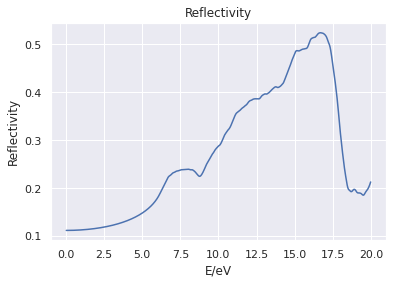

In [ ]:
plt.figure()
plt.title("Reflectivity")
plt.plot(df_for_alpha['E/ev'],df_for_alpha['R'])
plt.xlabel('E/eV')
plt.ylabel('Reflectivity')
plt.savefig('Reflectivity.png',dpi=300)

# Compare DFT and GW spectra

In [ ]:
eps_dft = pd.read_excel('eps.xlsx',header=0,sheet_name='ini_DFT_IPA')
eps_gw = pd.read_excel('eps.xlsx',header=0,sheet_name='ini_GW_IPA')

In [ ]:
def calc_n_k(Input_df):

    eps_1 = Input_df['EPS-Re']
    eps_2 = Input_df['EPS-Im']
    freq = Input_df['E/ev']

    eps_0 = eps_1[0]
    term1 = np.sqrt((np.square(eps_1) + np.square(eps_2)))
    n_square = 0.5 * (term1 + eps_1)
    k_square = 0.5 * (term1 - eps_1)
    n = np.sqrt(n_square)
    k = np.sqrt(k_square)
    Input_df['n'] = n
    Input_df['k'] = k


In [ ]:
def ev2lambda(eV):
    if eV == 0:
        return np.nan
    else:
        return 1.24/eV

In [ ]:
def clac_alpha_r(Input_df):
    Input_df['wavelength(um)'] = Input_df['E/ev'].apply(lambda x : ev2lambda(x))
    wavelength = Input_df['wavelength(um)']
    alpha = 4 * np.pi * Input_df['k'] / wavelength *1e4
    Input_df['absorption(cm^(-1))'] = alpha
    Input_df['R'] = ((Input_df['n'] - 1)*(Input_df['n'] - 1) + (Input_df['k']) * (Input_df['k']) )/ ((Input_df['n'] + 1)*(Input_df['n'] + 1) + (Input_df['k']) * (Input_df['k']))

In [ ]:
calc_n_k(eps_dft)
calc_n_k(eps_gw)
clac_alpha_r(eps_dft)
clac_alpha_r(eps_gw)

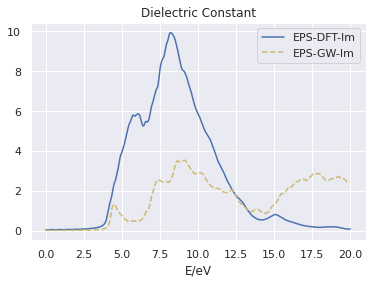

In [ ]:
sns.set_theme()
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_dft['E/ev'],eps_dft['EPS-Im'],'b', eps_gw['E/ev'],eps_gw['EPS-Im'],'--y')
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['EPS-DFT-Im','EPS-GW-Im'])
plt.savefig('Dielectric_Constant_compare_Im.png',dpi=300)

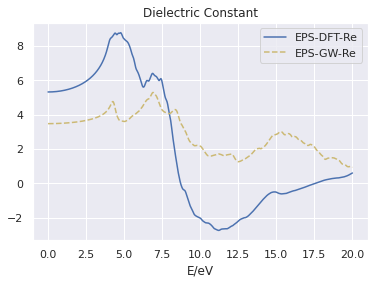

In [ ]:
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_dft['E/ev'],eps_dft['EPS-Re'],'b', eps_gw['E/ev'],eps_gw['EPS-Re'],'--y' )
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['EPS-DFT-Re','EPS-GW-Re'])
plt.savefig('Dielectric_Constant_compare_Re.png',dpi=300)

In [ ]:
eps_dft

,E/ev,EPS-Im,EPS-Re,n,k,wavelength(um),absorption(cm^(-1)),R
0,0.000000,0.055237,5.177124,2.275362,0.012138,NaN,NaN,0.151629
1,0.020000,0.055239,5.177157,2.275369,0.012138,62.000001,24.602513,0.151630
2,0.040000,0.055243,5.177254,2.275390,0.012139,31.000001,49.208703,0.151633
3,0.060000,0.055251,5.177417,2.275426,0.012141,20.666667,73.822250,0.151638
4,0.080000,0.055262,5.177646,2.275477,0.012143,15.500000,98.446924,0.151645
...,...,...,...,...,...,...,...,...
996,19.920000,0.282454,0.456564,0.704782,0.200384,0.062249,404520.916487,0.043207
997,19.939999,0.285420,0.458878,0.706852,0.201895,0.062187,407980.129751,0.042889
998,19.959999,0.287966,0.460684,0.708507,0.203220,0.062124,411069.186209,0.042653
999,19.980000,0.289944,0.462287,0.709921,0.204209,0.062062,413483.497427,0.042437


In [ ]:
eps_gw

,E/ev,EPS-Im,EPS-Re,n,k,wavelength(um),absorption(cm^(-1)),R
0,0.000000,0.027988,4.023380,2.005849,0.006976,NaN,NaN,0.111982
1,0.020000,0.027988,4.023392,2.005852,0.006977,62.000001,1.414036e+01,0.111983
2,0.040000,0.027989,4.023426,2.005860,0.006977,31.000001,2.828168e+01,0.111984
3,0.060000,0.027991,4.023481,2.005874,0.006977,20.666667,4.242497e+01,0.111986
4,0.080000,0.027993,4.023561,2.005894,0.006978,15.500000,5.657122e+01,0.111989
...,...,...,...,...,...,...,...,...
996,19.920000,0.826072,-0.108901,0.601796,0.686338,0.062249,1.385529e+06,0.207331
997,19.939999,0.823731,-0.114138,0.598942,0.687655,0.062187,1.389581e+06,0.209183
998,19.959999,0.820608,-0.119459,0.595734,0.688736,0.062124,1.393163e+06,0.211138
999,19.980000,0.816658,-0.124566,0.592257,0.689445,0.062062,1.395993e+06,0.213109


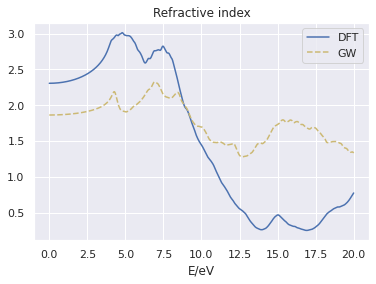

In [ ]:
plt.figure()
plt.title("Refractive index")
plt.plot(eps_dft['E/ev'],eps_dft['n'],'b', eps_gw['E/ev'],eps_gw['n'],'--y' )
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['DFT','GW'])
plt.savefig('Refractive_index_compare.png',dpi=300)

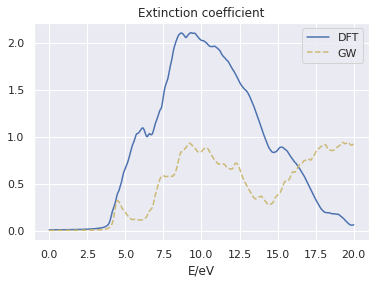

In [ ]:
plt.figure()
plt.title("Extinction coefficient")
plt.plot(eps_dft['E/ev'],eps_dft['k'],'b', eps_gw['E/ev'],eps_gw['k'],'--y' )
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['DFT','GW'])
plt.savefig('Extinction_coefficient_compare.png',dpi=300)

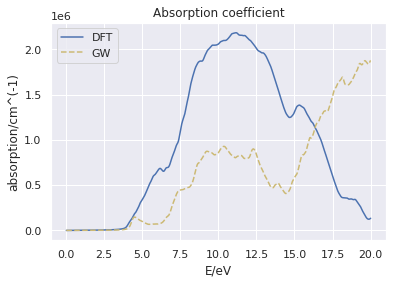

In [ ]:
plt.figure()
plt.title("Absorption coefficient")
plt.plot(eps_dft['E/ev'],eps_dft['absorption(cm^(-1))'],'b', eps_gw['E/ev'],eps_gw['absorption(cm^(-1))'],'--y' )
plt.xlabel('E/eV')
plt.ylabel('absorption/cm^(-1)')
plt.legend(['DFT','GW'])
plt.savefig('Absorption_coefficient_compare.png',dpi=300)

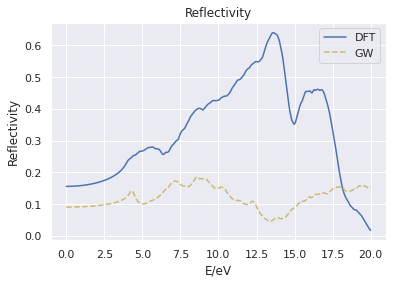

In [ ]:
plt.figure()
plt.title("Reflectivity")
plt.plot(eps_dft['E/ev'],eps_dft['R'],'b', eps_gw['E/ev'],eps_gw['R'],'--y' )
plt.xlabel('E/eV')
plt.ylabel('Reflectivity')
plt.legend(['DFT','GW'])
plt.savefig('Reflectivity_compare.png',dpi=300)

#Compare Different configurations

In [ ]:
eps_ini = pd.read_excel('eps_ini.xlsx',header=0,sheet_name='GW_IPA')
eps_far = pd.read_excel('eps_far.xlsx',header=0,sheet_name='GW_IPA')
eps_nn = pd.read_excel('eps_nn.xlsx',header=0,sheet_name='GW_IPA')

In [ ]:
compute_list = [eps_ini, eps_nn, eps_far]

for lst in compute_list:
    calc_n_k(lst)
    clac_alpha_r(lst)

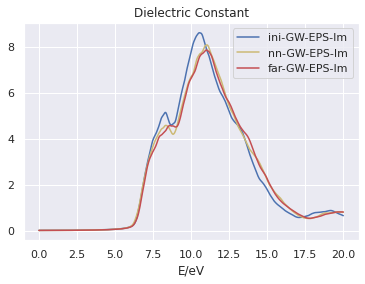

In [ ]:
sns.set_theme()
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_ini['E/ev'],eps_ini['EPS-Im'],'b', eps_nn['E/ev'],eps_nn['EPS-Im'],'-y', eps_far['E/ev'],eps_far['EPS-Im'],'-r')
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['ini-GW-EPS-Im','nn-GW-EPS-Im','far-GW-EPS-Im'])
plt.savefig('Dielectric_Constant_compare_Im.png',dpi=300)

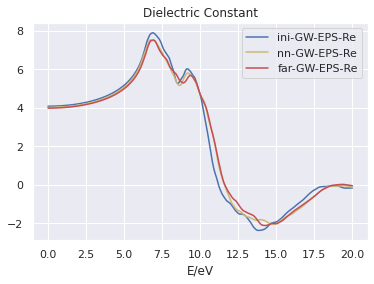

In [ ]:
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_ini['E/ev'],eps_ini['EPS-Re'],'b', eps_nn['E/ev'],eps_nn['EPS-Re'],'-y', eps_far['E/ev'],eps_far['EPS-Re'],'-r')
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['ini-GW-EPS-Re','nn-GW-EPS-Re','far-GW-EPS-Re'])
plt.savefig('Dielectric_Constant_compare_Re.png',dpi=300)

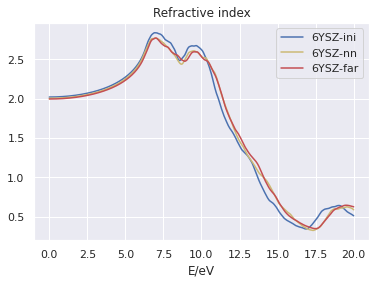

In [ ]:
plt.figure()
plt.title("Refractive index")
plt.plot(eps_ini['E/ev'],eps_ini['n'],'b', eps_nn['E/ev'],eps_nn['n'],'-y', eps_far['E/ev'],eps_far['n'],'-r' )
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['6YSZ-ini','6YSZ-nn','6YSZ-far'])
plt.savefig('Refractive_index_compare.png',dpi=300)

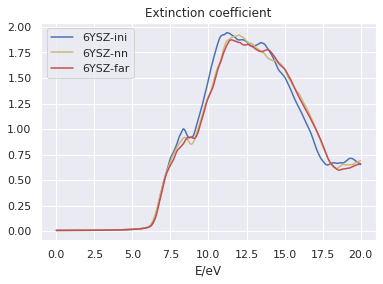

In [ ]:
plt.figure()
plt.title("Extinction coefficient")
plt.plot(eps_ini['E/ev'],eps_ini['k'],'b', eps_nn['E/ev'],eps_nn['k'],'-y', eps_far['E/ev'],eps_far['k'],'-r' )
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['6YSZ-ini','6YSZ-nn','6YSZ-far'])
plt.savefig('Extinction_coefficient_compare.png',dpi=300)

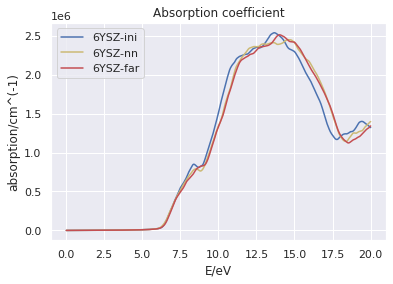

In [ ]:
plt.figure()
plt.title("Absorption coefficient")
plt.plot(eps_ini['E/ev'],eps_ini['absorption(cm^(-1))'],'b', eps_nn['E/ev'],eps_nn['absorption(cm^(-1))'],'-y', eps_far['E/ev'],eps_far['absorption(cm^(-1))'],'-r' )
plt.xlabel('E/eV')
plt.ylabel('absorption/cm^(-1)')
plt.legend(['6YSZ-ini','6YSZ-nn','6YSZ-far'])
plt.savefig('Absorption_coefficient_compare.png',dpi=300)

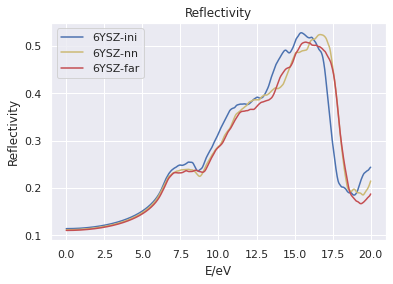

In [ ]:
plt.figure()
plt.title("Reflectivity")
plt.plot(eps_ini['E/ev'],eps_ini['R'],'b', eps_nn['E/ev'],eps_nn['R'],'-y', eps_far['E/ev'],eps_far['R'],'-r' )
plt.xlabel('E/eV')
plt.ylabel('Reflectivity')
plt.legend(['6YSZ-ini','6YSZ-nn','6YSZ-far'])
plt.savefig('Reflectivity_compare.png',dpi=300)

#Compare different material

In [ ]:
eps_zro2 = pd.read_excel('eps_zro2.xlsx',header=0,sheet_name='DFT_IPA')
eps_6ysz = pd.read_excel('eps_6ysz.xlsx',header=0,sheet_name='DFT_IPA')
eps_yta = pd.read_excel('eps_yta.xlsx',header=0,sheet_name='ini_DFT_IPA')

In [ ]:
compute_list = [eps_zro2, eps_6ysz, eps_yta]

for lst in compute_list:
    calc_n_k(lst)
    clac_alpha_r(lst)

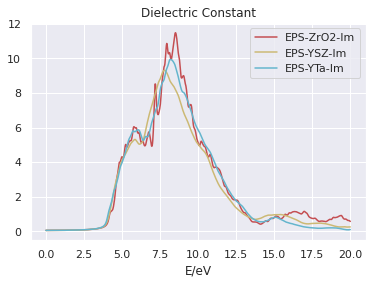

In [ ]:
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_zro2['E/ev'],eps_zro2['EPS-Im'],'r', eps_6ysz['E/ev'],eps_6ysz['EPS-Im'],'-y',eps_yta['E/ev'],eps_yta['EPS-Im'],'c')
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['EPS-ZrO2-Im','EPS-YSZ-Im','EPS-YTa-Im'])
plt.savefig('Dielectric_Constant_compare_Im.png',dpi=300)

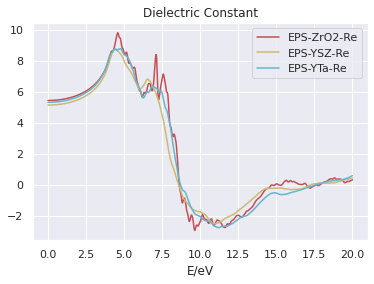

In [ ]:
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_zro2['E/ev'],eps_zro2['EPS-Re'],'r', eps_6ysz['E/ev'],eps_6ysz['EPS-Re'],'-y',eps_yta['E/ev'],eps_yta['EPS-Re'],'c')
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['EPS-ZrO2-Re','EPS-YSZ-Re','EPS-YTa-Re'])
plt.savefig('Dielectric_Constant_compare_Re.png',dpi=300)

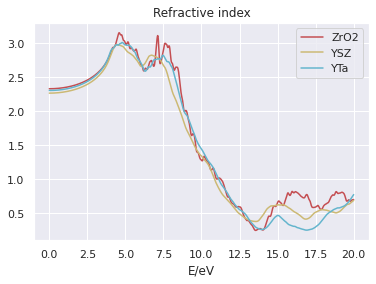

In [ ]:
plt.figure()
plt.title("Refractive index")
plt.plot(eps_zro2['E/ev'],eps_zro2['n'],'r', eps_6ysz['E/ev'],eps_6ysz['n'],'-y',eps_yta['E/ev'],eps_yta['n'],'c')
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['ZrO2','YSZ','YTa'])
plt.savefig('Refractive_index_compare.png',dpi=300)

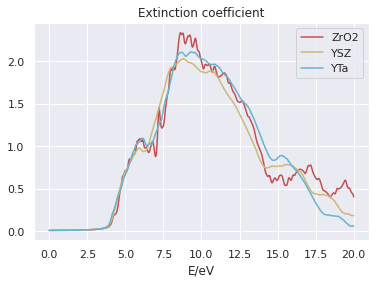

In [ ]:
plt.figure()
plt.title("Extinction coefficient")
plt.plot(eps_zro2['E/ev'],eps_zro2['k'],'r', eps_6ysz['E/ev'],eps_6ysz['k'],'-y',eps_yta['E/ev'],eps_yta['k'],'c')
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['ZrO2','YSZ','YTa'])
plt.savefig('Extinction_coefficient_compare.png',dpi=300)

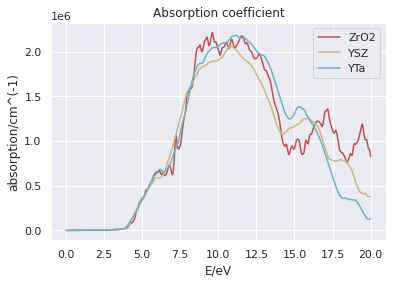

In [ ]:
plt.figure()
plt.title("Absorption coefficient")
plt.plot(eps_zro2['E/ev'],eps_zro2['absorption(cm^(-1))'],'r', eps_6ysz['E/ev'],eps_6ysz['absorption(cm^(-1))'],'-y', eps_yta['E/ev'],eps_yta['absorption(cm^(-1))'],'-c' )
plt.xlabel('E/eV')
plt.ylabel('absorption/cm^(-1)')
plt.legend(['ZrO2','YSZ','YTa'])
plt.savefig('Absorption_coefficient_compare.png',dpi=300)

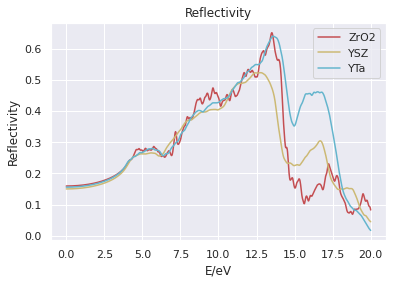

In [ ]:
plt.figure()
plt.title("Reflectivity")
plt.plot(eps_zro2['E/ev'],eps_zro2['R'],'r', eps_6ysz['E/ev'],eps_6ysz['R'],'-y', eps_yta['E/ev'],eps_yta['R'],'-c' )
plt.xlabel('E/eV')
plt.ylabel('Reflectivity')
plt.legend(['ZrO2','YSZ','YTa'])
plt.savefig('Reflectivity_compare.png',dpi=300)

# Compare PP

In [ ]:
eps_zro2 = pd.read_excel('eps_zro2.xlsx',header=0,sheet_name='DFT_IPA')
eps_zro2_wfcs = pd.read_excel('eps_oncv_wfcs.xlsx',header=0,sheet_name='DFT_IPA')
calc_n_k(eps_zro2)
clac_alpha_r(eps_zro2)
calc_n_k(eps_zro2_wfcs)
clac_alpha_r(eps_zro2_wfcs)

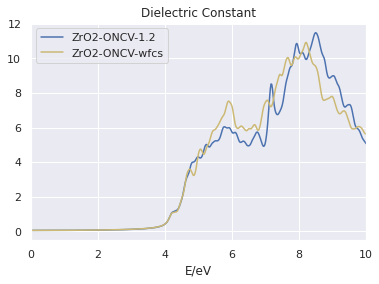

In [ ]:
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_zro2['E/ev'],eps_zro2['EPS-Im'],'b', eps_zro2_wfcs['E/ev'],eps_zro2_wfcs['EPS-Im'],'-y')
plt.xlim((0,10))
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['ZrO2-ONCV-1.2','ZrO2-ONCV-wfcs'])
plt.savefig('Dielectric_Constant_compare_Im.png',dpi=300)

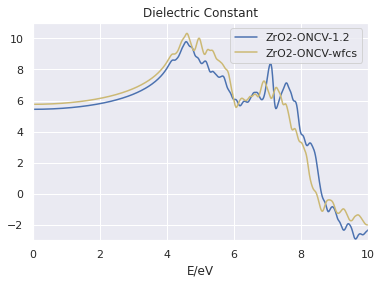

In [ ]:
plt.figure()
plt.title("Dielectric Constant")
plt.plot(eps_zro2['E/ev'],eps_zro2['EPS-Re'],'b', eps_zro2_wfcs['E/ev'],eps_zro2_wfcs['EPS-Re'],'-y')
plt.xlim((0,10))
plt.ylim((-3,11))
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['ZrO2-ONCV-1.2','ZrO2-ONCV-wfcs'])
plt.savefig('Dielectric_Constant_compare_Re.png',dpi=300)

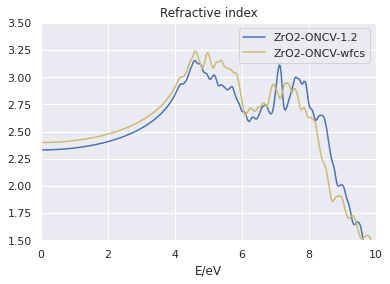

In [ ]:
plt.figure()
plt.title("Refractive index")
plt.plot(eps_zro2['E/ev'],eps_zro2['n'],'b', eps_zro2_wfcs['E/ev'],eps_zro2_wfcs['n'],'-y')
plt.xlim((0,10))
plt.ylim((1.5,3.5))
plt.xlabel('E/eV')
plt.ylabel('')
plt.legend(['ZrO2-ONCV-1.2','ZrO2-ONCV-wfcs'])
plt.savefig('Refractive_index_compare.png',dpi=300)

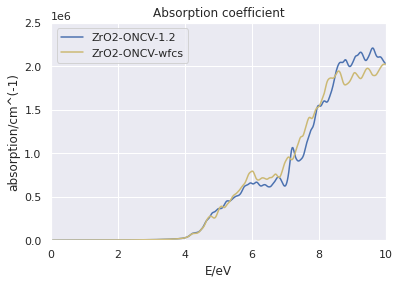

In [ ]:
plt.figure()
plt.title("Absorption coefficient")
plt.plot(eps_zro2['E/ev'],eps_zro2['absorption(cm^(-1))'],'b', eps_zro2_wfcs['E/ev'],eps_zro2_wfcs['absorption(cm^(-1))'],'-y')
plt.xlabel('E/eV')
plt.xlim((0,10))
plt.ylim((0,2.5e6))
plt.ylabel('absorption/cm^(-1)')
plt.legend(['ZrO2-ONCV-1.2','ZrO2-ONCV-wfcs'])
plt.savefig('Absorption_coefficient_compare.png',dpi=300)